## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 8 #



In questa esercitazione abbiamo, tramite metodi variazionali, ottimizzato il ground state di una singola particella quantistica in una dimensione, sotto l'effetto del seguente un potenziale esterno:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Non è possibile risolvere analiticamente questo problema, per trovare la funzione d'onda del ground state abbiamo dovuto applicare un metodo variazionale Montecarlo. Data una funzione di prova, dipendente da diversi parametri, il metodo va a trovare i valori ottimizzati di tali parametri. In questo caso la funzione di prova era del tipo:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Questa rappresenta la sovrapposizione di due gaussiane, aventi la stessa larghezza $\sigma$ e centrate in $\pm \mu$. Data la forma del potenziale, caratterizzato da due buche simmetriche rispetto all'origine, è ragionevole pensare che una funzione d'onda di questo tipo possa essere una buona prima approssimazione.

### esercizio 8.1 

Nel primo esercizio abbiamo usato l'algoritmo di Metropolis per campionare il modulo quadro $|\Psi_T(x)|^2$ della funzione d'onda di prova. A questo scopo abbiamo utilizzato una probabilità di transizione $T(x_{new}|x_{old})$ uniforme. 

Successivamente abbiamo utilizzato tale distribuzione per stimare il valore di aspettazione dell'Hamiltoniana, definito come:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Per stimare tale valore medio abbiamo utilizato il dat blocking.
Nel corso di tutta la simulazione abbiamo fissato Use $\hbar = 1$ and $m=1$.

Di seguito riportiamo i risultati ottenuti fissando i valori dei parametri a $\sigma = 1.0$ e $\mu = 2.0$.
Abbiamo valutato $\langle {\hat H} \rangle$ suddividendo $10^5$ step in $100$ blocchi. Allo scopo di ottenere un percentuale di accettazione dell'algoritmo di Metropolis pari a circa il $50%$, abbiamo, dopo qualche tentativo, fissato il valore del del passo $\delta = 5.0$.



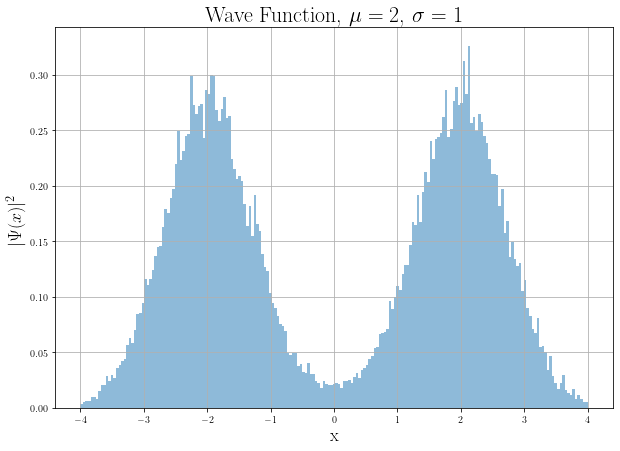

In [10]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x = np.loadtxt("histo1.txt")
bins = np.linspace(-4, 4, 200)



plt.figure(figsize=(10, 7))
plt.hist(x, bins, alpha=0.5, density=True, label='N=1')
plt.xlabel('x', fontsize=18)
plt.ylabel('$|\Psi(x)|^2$', fontsize=18)
plt.title('Wave Function, $\mu = 2$, $\sigma = 1$', fontsize=22)
plt.grid(True)


plt.show()

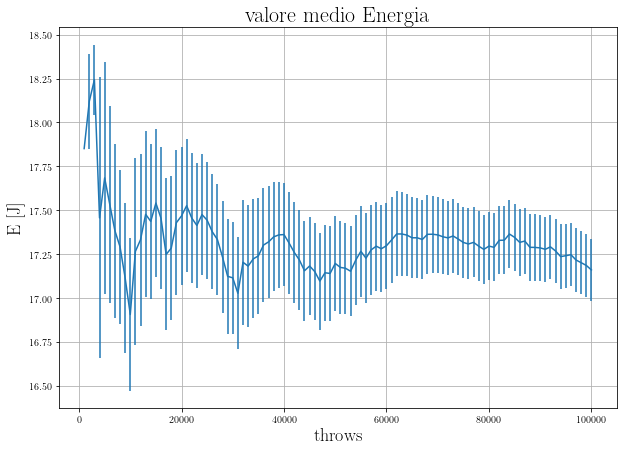

Risultato finale : 
17.1604
Errore statistico : 
0.178185


In [6]:
x, f, error = np.loadtxt("8.1.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10, 7))
plt.errorbar(x,f  ,yerr=error)
plt.xlabel('throws' , fontsize=18)
plt.ylabel('E [J]', fontsize=18)
plt.title("valore medio Energia", fontsize=22)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])

### esercizio 8.2

Nel secondo esercizio abbiamo studiato il valore medio dell'energia ottenuto variando i due paametri $\sigma$ e $\mu$. Così facendo abbiamo stimato i valori dei parametri che minimizzavano l'energia media, e quindi quelli che meglio ottimizzano la funzione d'onda di prova.

Di seguito riportiamo un plot coi valori dell'energia media, abbiamo fatto variare $\sigma$ tra $[0.15, 1.15]$ e $\mu$ tra $[0.33, 1.33]$.

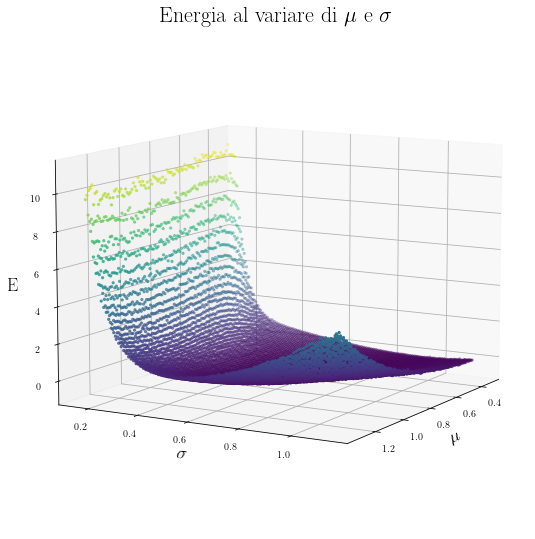

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rc('text', usetex=True)
plt.rc('font', family='arial')


mu, sigma, matr = np.loadtxt("8.2.txt", usecols=(0,1,2), delimiter=', ', unpack='true')

fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig)
ax.scatter(mu, sigma, matr, c=matr, marker='.')
ax.set_xlabel('$\mu$', fontsize=18)
ax.set_ylabel('$\sigma$', fontsize=18)
ax.set_zlabel('E', fontsize=18)
ax.view_init(10, 30)
plt.title("Energia al variare di $\mu$ e $\sigma$", fontsize=22)
plt.show()

Come si può notare dal grafico, al variare dei parametri $\sigma$ e $\mu$ c'è effettivamente un minimo dell'energia. In particolare, si trova in corrispondenza dei seguenti valori:
- $\sigma = 0.61$
- $\mu = 0.81$

In corrispondenza di questi valori dei parametri possiamo andare a campionare un istogramma della distribuzione utilizzando il codice sviluppato nell'esercizio precedente.

Ne riportiamo di seguito i risultati ottenuti. Abbiamo confrontato la distribuzione da noi ottenuta con quella ottenuta con altri metodi numerici trasformando l'equazione di Schrodinger in un'equazione matriciale.

Ground state energy:  -0.4604658796927149
1st excited state energy:  0.09742471331761227
2nd excited state energy:  1.971733134393021


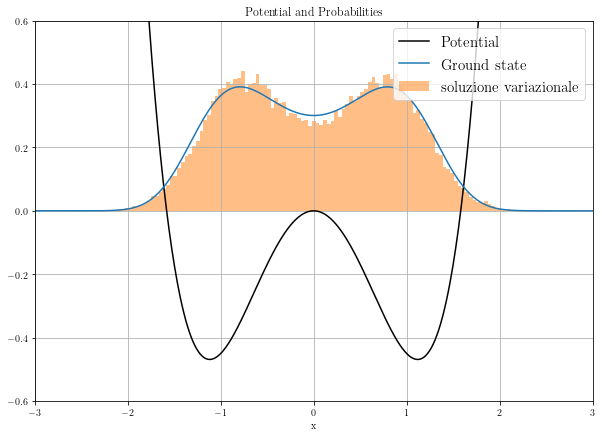

In [17]:

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(10, 7))


scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label = "Ground state")


xh = np.loadtxt("histo2.txt")
bins = np.linspace(-4, 4, 200)
plt.hist(xh, bins, alpha=0.5, density=True, label='soluzione variazionale')

plt.legend(loc='best', fontsize=15)
plt.title("Potential and Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()